In [1]:
import arc
from arc import *
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Latex
import scipy
h = scipy.constants.h

In [2]:
Rb = arc.Rubidium()
Cs = arc.Caesium()

dif = 1
ns = np.arange(30,130)

jp1 = (3/2,3/2)
jp2 = (1/2,3/2)
jp3 = (3/2,1/2)
jp4 = (1/2,1/2)

jps = [jp1, jp2, jp3, jp4]

jp_deltas = []
for jp in jps:    

    delta = []
    for n in ns:
        nb = n+dif
        defect_Rb = Rb.getEnergy(n, 1, jp[0], 1/2) - Rb.getEnergy(n, 0, 1/2, 1/2)
        defect_Rb2 = Rb.getEnergy(n+dif, 0, 1/2, 1/2) - Rb.getEnergy(n+dif-1, 1, jp[1], 1/2)
        defect = defect_Rb - defect_Rb2
        delta.append(defect*1.6e-19/h/1e9)
    jp_deltas.append(delta)



In [3]:
deltas = []
na_nbs = []

In [4]:
min_defects = [min(np.array(jp_deltas[0]), key=abs), 
               min(np.array(jp_deltas[1]), key=abs), 
               min(np.array(jp_deltas[2]), key=abs), 
               min(np.array(jp_deltas[3]), key=abs)]
assoc_ns = [ns[jp_deltas[0].index(min_defects[0])],
            ns[jp_deltas[1].index(min_defects[1])],
            ns[jp_deltas[2].index(min_defects[2])],
            ns[jp_deltas[3].index(min_defects[3])]]

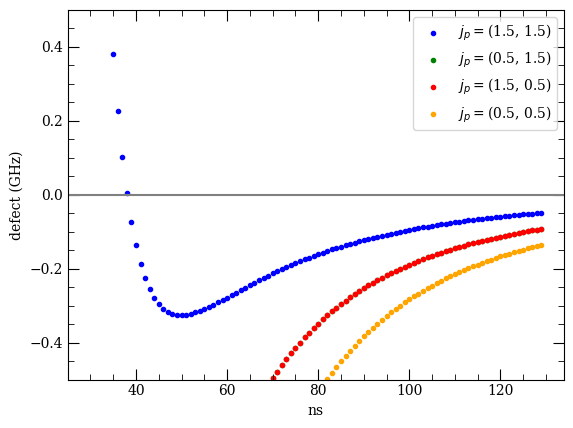

channel 4 = |Rb 38s_1/2, Rb 39s_1/2> -> |Rb 37p_1.5, Rb 39p_1.5>
j_pa, j_pb = (1.5, 1.5)
min defect = 4.451482689658833
n = 38
channel 3 = |Rb 129s_1/2, Rb 130s_1/2> -> |Rb 128p_0.5, Rb 130p_1.5>
j_pa, j_pb = (0.5, 1.5)
min defect = -92.09733413563377
n = 129
channel 2 = |Rb 129s_1/2, Rb 130s_1/2> -> |Rb 128p_1.5, Rb 130p_0.5>
j_pa, j_pb = (1.5, 0.5)
min defect = -92.09733413563377
n = 129
channel 1 = |Rb 129s_1/2, Rb 130s_1/2> -> |Rb 128p_0.5, Rb 130p_0.5>
j_pa, j_pb = (0.5, 0.5)
min defect = -135.13023481104833
n = 129


In [5]:
plt.figure()
plt.scatter(ns,jp_deltas[0], label='$j_p =$' + str(jp1), color = 'blue', marker='.')
plt.scatter(ns,jp_deltas[1], label='$j_p =$' + str(jp2), color = 'green', marker='.')
plt.scatter(ns,jp_deltas[2], label='$j_p =$' + str(jp3), color = 'red', marker='.')
plt.scatter(ns,jp_deltas[3], label='$j_p =$' + str(jp4), color = 'orange', marker='.')

plt.axhline(y=0, color='grey')
plt.legend()
plt.ylabel('defect (GHz)')
plt.xlabel('ns')

plt.ylim([-0.5,0.5])

plt.show()
for i in range(4):
    print(f'channel {4-i} = |Rb {assoc_ns[i]}s_1/2, Rb {assoc_ns[i]+dif}s_1/2> -> |Rb {assoc_ns[i]-1}p_{jps[i][0]}, Rb {assoc_ns[i]+dif}p_{str(jps[i][1])}>')
    print(f'j_pa, j_pb = {jps[i]}')
    print(f'min defect = {min_defects[i]*1e3}')
    print(f'n = {assoc_ns[i]}')


This is more in agreemant with literature


Calculating Hamiltonian matrix...


	matrix (dimension  5 )

Matrix R3 100.0 % (state 3 of 3)

                  ARPACK can only find up to dimension-1 eigenvectors, where                dimension is matrix dimension.



Diagonalizing interaction matrix...

99% Now we are plotting...


[[129, 1, 1.5, 129, 1, 1.5, np.float64(-0.04913118053150689)],
 [129, 0, 0.5, 130, 0, 0.5, np.float64(0.0)],
 [130, 0, 0.5, 129, 0, 0.5, np.float64(0.0)]]

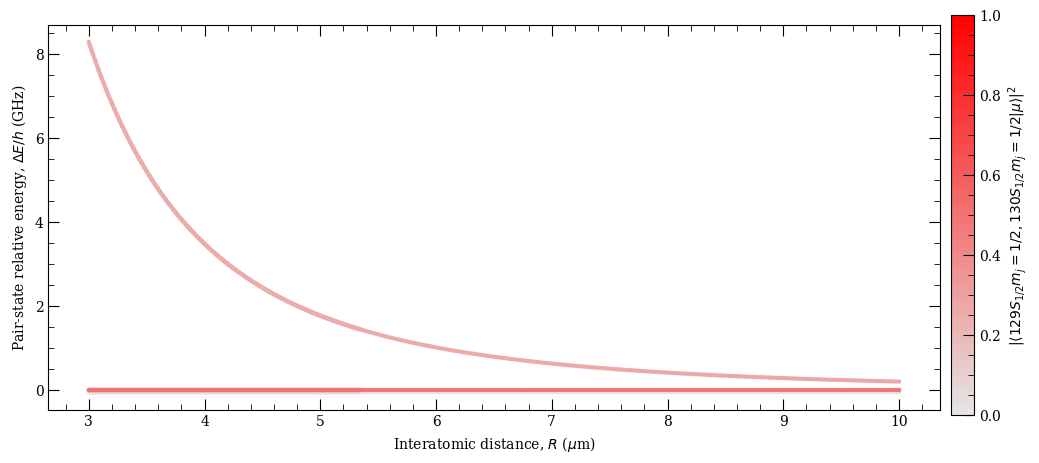

In [34]:
channel = 1

pair = PairStateInteractions(Rubidium(), assoc_ns[4-channel], 0, 1/2, assoc_ns[4-channel]+dif, 0, 1/2, 1/2, 1/2)

pair.defineBasis(0, 0, 3, 1, 5e7, progressOutput=True)

rvdw = pair.getLeRoyRadius()

r = np.append(np.linspace(rvdw, 3, 300), np.linspace(3.01, 10.0, 300))

nEig = 250
pair.diagonalise(r, nEig, progressOutput=True)

pair.plotLevelDiagram()

pair.channel

129
-1.8419466827126754

Calculating Hamiltonian matrix...


	matrix (dimension  5 )

Matrix R3 100.0 % (state 3 of 3)

                  ARPACK can only find up to dimension-1 eigenvectors, where                dimension is matrix dimension.



Diagonalizing interaction matrix...

99% Now we are plotting...


[[129, 1, 1.5, 129, 1, 1.5, np.float64(-0.04913118053150689)],
 [129, 0, 0.5, 130, 0, 0.5, np.float64(0.0)],
 [130, 0, 0.5, 129, 0, 0.5, np.float64(0.0)]]

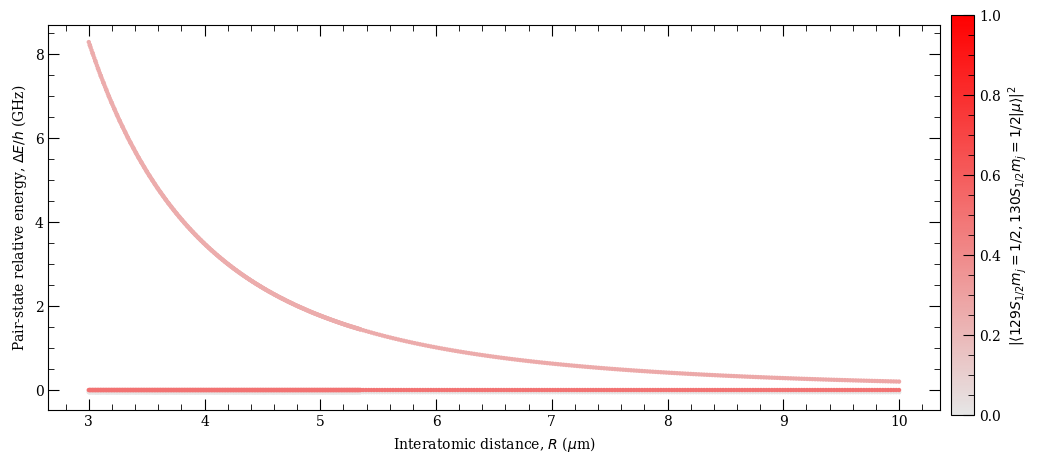

In [50]:
channel = 2

pair = PairStateInteractions(Rubidium(), assoc_ns[4 - channel], 0, 1/2, assoc_ns[4 - channel]+dif, 0, 1/2, 1/2, 1/2)

print(assoc_ns[channel-1])
print(min_defects[4-channel]*1e9/5e7)

pair.defineBasis(0, 0, dif+1, 1, 1*abs(min_defects[4 - channel]*1e9), progressOutput=True)

rvdw = pair.getLeRoyRadius()

r = np.append(np.linspace(rvdw, 3, 300), np.linspace(3.01, 10.0, 300))

nEig = 250
pair.diagonalise(r, nEig, progressOutput=True)

pair.plotLevelDiagram()

pair.channel

Data points to fit =  514
It's estimated to be around 491.98 mu m from the current fit.
Rvdw =   491.9752602804262  mu m
offset =  -0.06558924927268131 
 scale =  462.6365521739484


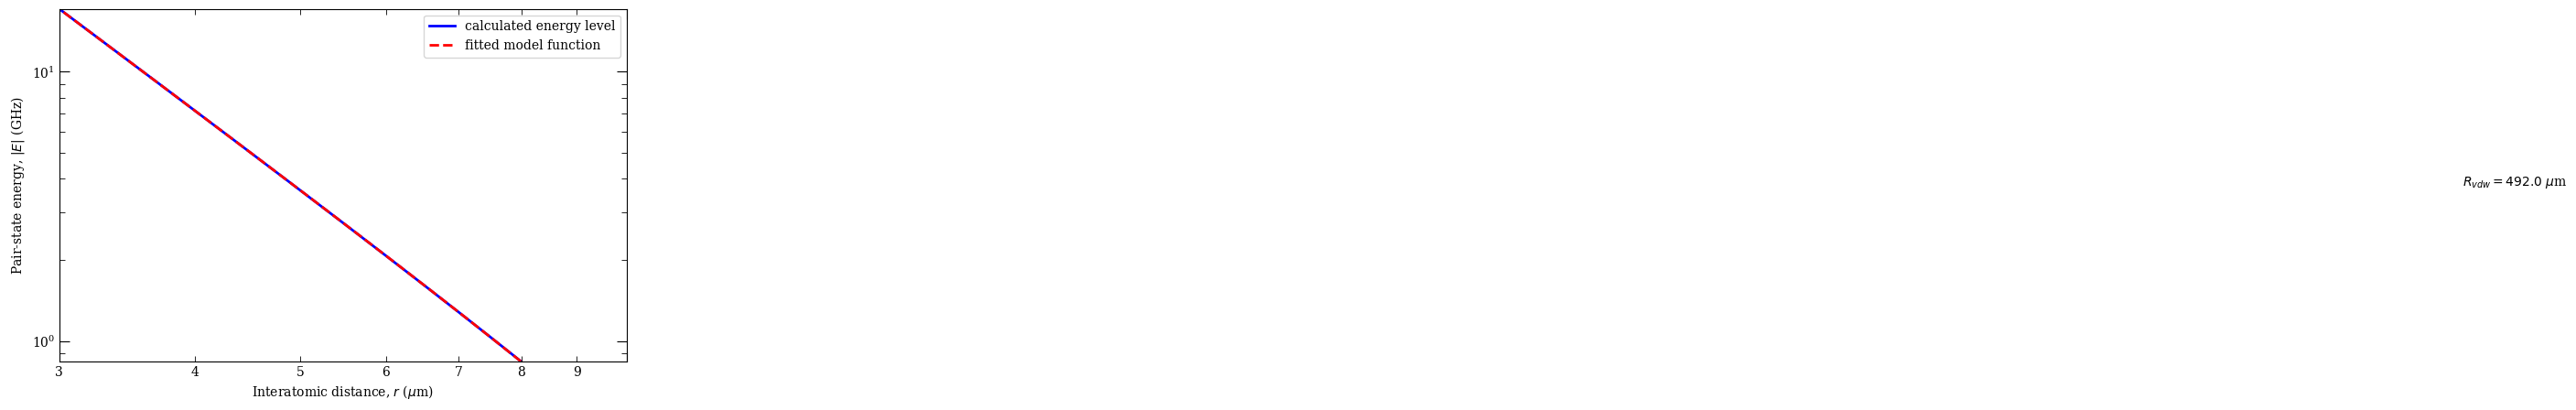

c3 =  462.187027164738  GHz /R^3 (mu m)^3
offset =  -0.06190097547178319


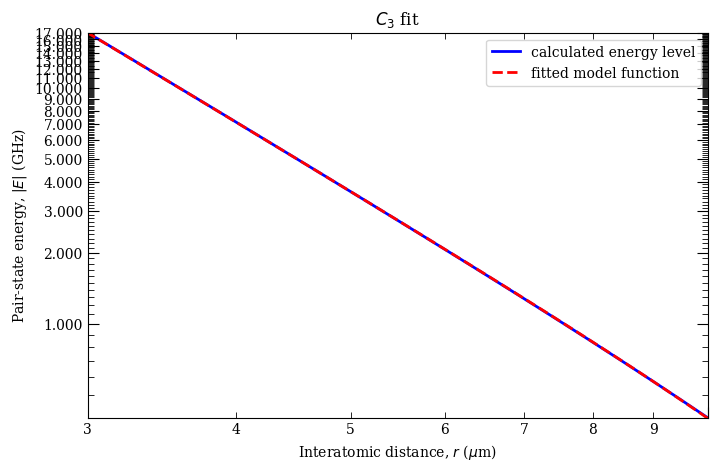


ERROR: could not find data for energy levels for interatomic
distances between 640 and 5.00 mu m.




0

In [7]:
rvdw = pair.getVdwFromLevelDiagram(
    1.000000, 8.000000, minStateContribution=0.2, showPlot=True
)
pair.getC3fromLevelDiagram(
    1.8, rvdw * 0.99, showPlot=True, minStateContribution=0.2
)
pair.getC6fromLevelDiagram(
    1.3 * rvdw, 5.0, showPlot=True, minStateContribution=0.2
)

In [8]:
pair.showPlot()

0

In [9]:
# C3 coefficients

rb_matrix_element_l = arc.Rubidium().getReducedMatrixElementL(59, 0, .5, 58, 1, .5)

rb_matrix_element_j = arc.Rubidium().getReducedMatrixElementJ(59, 0, .5, 58, 1, .5)

print(rb_matrix_element_j)
print(rb_matrix_element_l)

cs_matrix_element_l = arc.Caesium().getReducedMatrixElementL(57, 0, .5, 57, 1, .5)

cs_matrix_element_j = arc.Caesium().getReducedMatrixElementJ(57, 0, .5, 57, 1, .5)

print(cs_matrix_element_j)
print(cs_matrix_element_l)

rb_dme = arc.Rubidium().getDipoleMatrixElement(59, 0, .5, .5, 58, 1, .5, .5, 0)
cs_dme = arc.Caesium().getDipoleMatrixElement(57, 0, .5, .5, 57, 1, .5, .5, 0)

epsilon_0 = scipy.constants.epsilon_0
a_0 = scipy.constants.physical_constants['Bohr radius']
e = scipy.constants.e
c3k = 1/(4*np.pi*epsilon_0)*rb_dme*cs_dme/1e9*1e6**3/(a_0[0]*e)**2
c3k

-2683.017521528454
-3286.0119493457464
-2709.365410080856
-3318.2813907222976


np.float64(1.5148101045488742e+83)